# PyPlot

This file demonstrates how to create plots in Julia by using the [PyPlot](https://github.com/stevengj/PyPlot.jl) package.

PyPlot relies on the matplotlib library, which is part of Python. If you have Python installed, then it will be used as is. Otherwise, see PyPlot's homepage for instructions on how to install.

Collection of examples are available
[Plot Examples](https://gist.github.com/gizmaa/7214002) 
and the [Julia Plots Gallery](https://goropikari.github.io/PlotsGallery.jl/).

In [1]:
using Dates            

using PyPlot
#PyPlot.svg(true)         #prettier figures. Currently, it creates problems on Julia 1.2.0

# A First Plot

The next figure shows several curves.

The subequent figure adds a title, axis labels and legends. Text and font sizes are illustrated. The axis limits and the tick marks are set manually. 

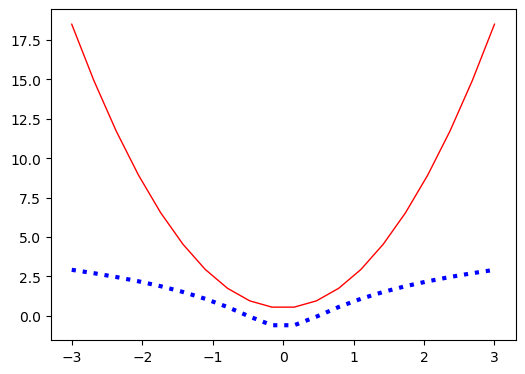

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002EA754C8>

In [2]:
x = range(-3,stop=3,length=20)    
y = 2*x.^2 .+ 0.5

figure(figsize=(6,4.3))       #width and height, in inches           
  plot(x,y,linestyle="-",color="r",linewidth=1.0)
  plot(x,log.(y),linestyle=":",color="b",linewidth=3.0)

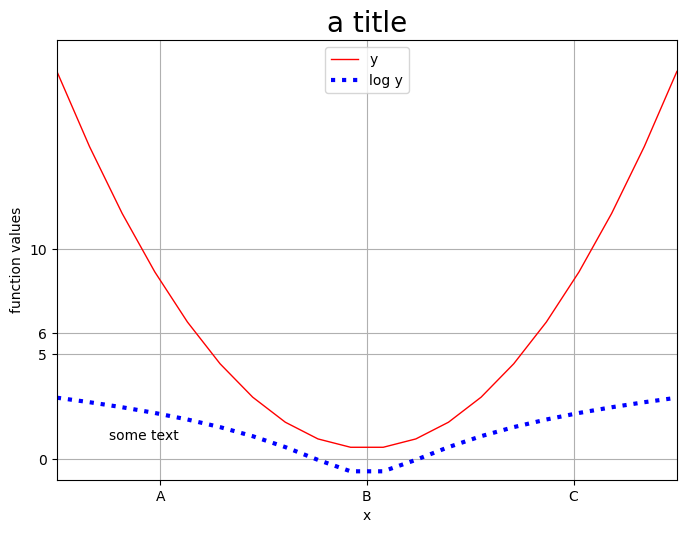

In [3]:
#now with title, labels and more - and larger

figure(figsize=(8,5.71))
  plot(x,y,linestyle="-",color="r",linewidth=1.0)
  plot(x,log.(y),linestyle=":",color="b",linewidth=3.0)
  plt.xticks([-2;0;2],["A";"B";"C"])       
  plt.yticks([0;5;6;10])  
  grid(true)
  title("a title",fontsize=20)
  xlim(-3,3)               # set limits of the x-axis
  ylim(-1,20)              # set limits of the y-axis
  xlabel("x")
  ylabel("function values")
  text(-2.5,0.9,"some text")
  legend(["y";"log y"],loc="upper center")
savefig("AFirstPlot.pdf")      #save pdf file of the plot

# Subplots

are easily constructed using the `subplot()` command. For a the first subplot in a 2x2 grid, use `subplot(2,2,1)`.

The `fig.set_size_inches(16,10.7,forward=false)` before the `savefig()` command (see below) tweaks the saving so the size of the saved graphics is not cut by your screen size.

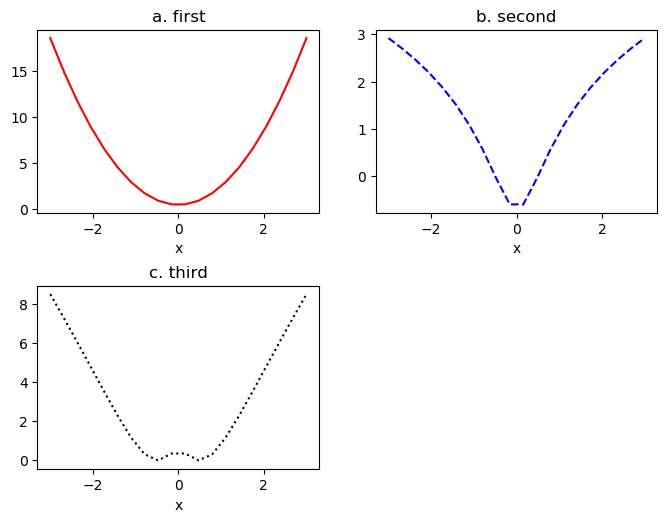

In [4]:
fig = figure(figsize=(8,5.7))                      #subplots
subplot(2,2,1)
  plot(x,y,"r-")
  title("a. first")
  xlabel("x")
subplot(2,2,2)
  plot(x,log.(y),"b--")
  title("b. second")
  xlabel("x")
subplot(2,2,3)
  plot(x,log.(y).^2,"k:")
  title("c. third")
  xlabel("x")
subplots_adjust(hspace = 0.4)                 #to give more vertical space between "row" 1 and 2

#fig.set_size_inches(16,10.7,forward=false)    #to save really large figure
#savefig("ASecondPlot.pdf") 

# Adding Horizontal and Vertical Lines

by `hlines()`, `vlines()`, `axhline()` or `axvline()`.

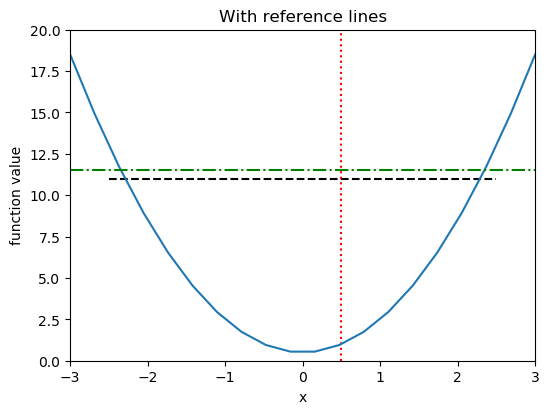

PyObject <matplotlib.collections.LineCollection object at 0x0000000001028508>

In [5]:
figure(figsize=(6,4.3))
  plot(x,y)
  xlim(-3,3)
  ylim(0,20)
  title("With reference lines")
  xlabel("x")
  ylabel("function value")
  hlines(11,-2.5,2.5,linestyle="--",color="black")   #streches over x=[-2.5;2.5] 
  axhline(11.5,linestyle="-.",color="g")             #streches over all x
  vlines(0.5,0,20,linestyle=":",color="r")

# LaTeX in the Figure

PyPlot calls on LaTeXStrings so you can, for instance, use `xlabel(L"$\alpha$")` to get the x label in LaTeX. You should probably also change the general font to "cm" (see below) to make the various text elements look more similar.

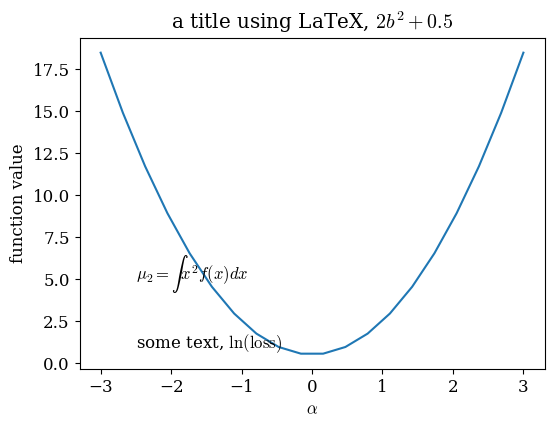

In [6]:
PyPlot.matplotlib.rc("mathtext",fontset="cm")        #computer modern font 
PyPlot.matplotlib.rc("font",family="serif",size=12)  #font similar to LaTeX
figure(figsize=(6,4.3))
  plot(x,y)
  title(L"a title using LaTeX, $2 b^2 + 0.5$")
  xlabel(L"$\alpha$")
  ylabel("function value")
  text(-2.5,0.9,L"some text, $\ln(\mathrm{loss})$")
  text(-2.5,5,L"$\mu_2 = \int x^2 f(x) dx$")

PyPlot.matplotlib.rc("font",family="sans-serif",size=12)  #resetting the font

# Bars (with annotation) and Stairs

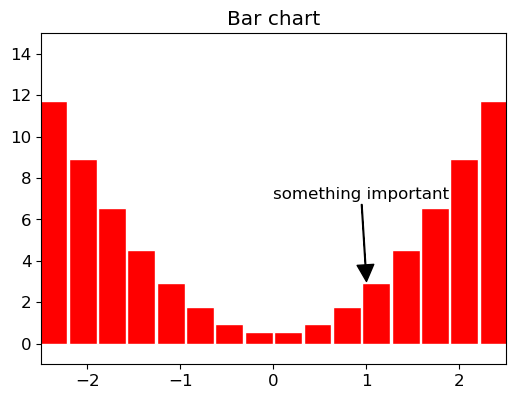

PyObject Text(0.5, 0.5, 'something important')

In [7]:
figure(figsize=(6,4.3))       
  bar(x,y,facecolor="red",edgecolor="white",align="center",width=0.3)
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Bar chart")
  txt = "something important"
  annotate(txt,xy=[0.7;0.25],xycoords="axes fraction",xytext=[0.5;0.5],
           textcoords="axes fraction",arrowprops=Dict("facecolor"=>"black","width"=>0.5))

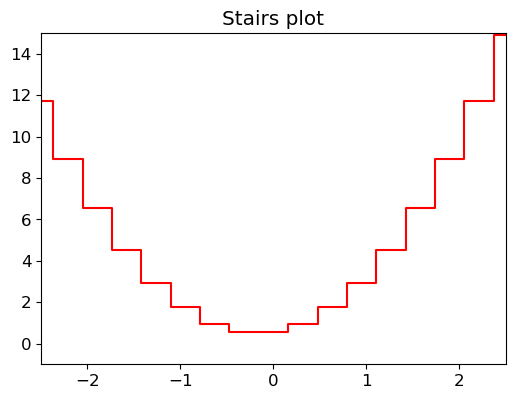

PyObject Text(0.5, 1, 'Stairs plot')

In [8]:
figure(figsize=(6,4.3))
  step(x,y,linewidth=1.5,color="r")
  xlim(-2.5,2.5)              
  ylim(-1,15)              
  title("Stairs plot")

# Surface (3D) Plots

The next plot creates a surface plot. 
Notice that if `x` is a 20 vector, `y` is a 25 vector, and `z` is 20x25, then you need to use
`surf(x,y,z')`.

In the subsequent plot, we rotate the view and also customize the axes and tick marks.

(20,)(25,)

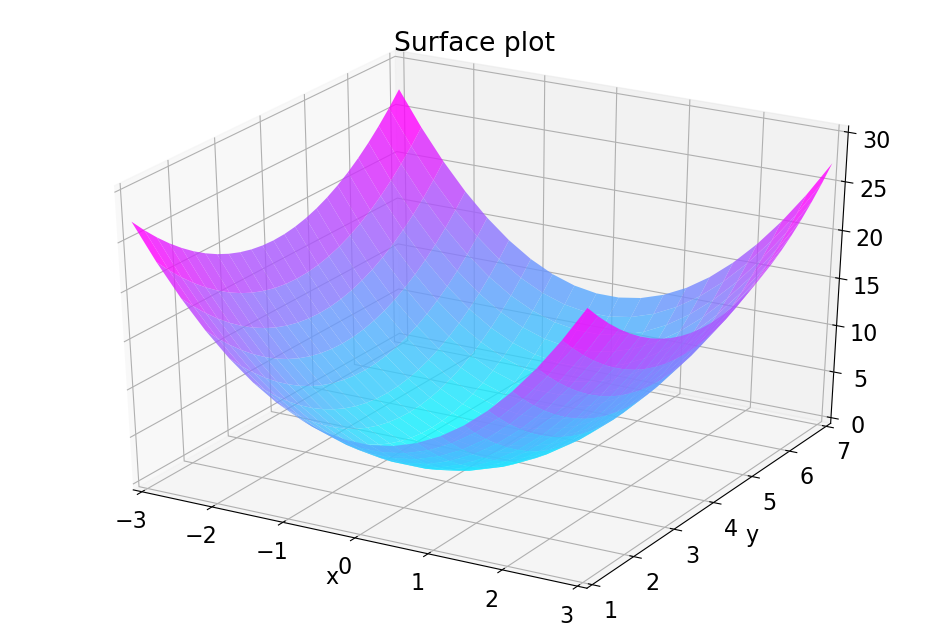

(25, 20)


PyObject Text(0.5, 0.92, 'Surface plot')

In [9]:
x = range(-3,stop=3,length=20)       #create some "data" to plot
y = range(1,stop=7,length=25)

z = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for j = 1:length(y)                  #create z column by column
  z[:,j] = 2*x.^2 .+ (y[j]-4)^2 - 0.0*x.*(y[j]-4)
end

#notice the arguments: x,y,z'
println(size(x),size(y),size(z'))

PyPlot.matplotlib.rc("font",size=16)
fig = figure(figsize=(12,8))
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)    
  xlim(-3,3)              #change rstride and cstride to improve the look            
  ylim(1,7)               
  zlim(0,30)
  xlabel("x")
  ylabel("y")
  title("Surface plot")

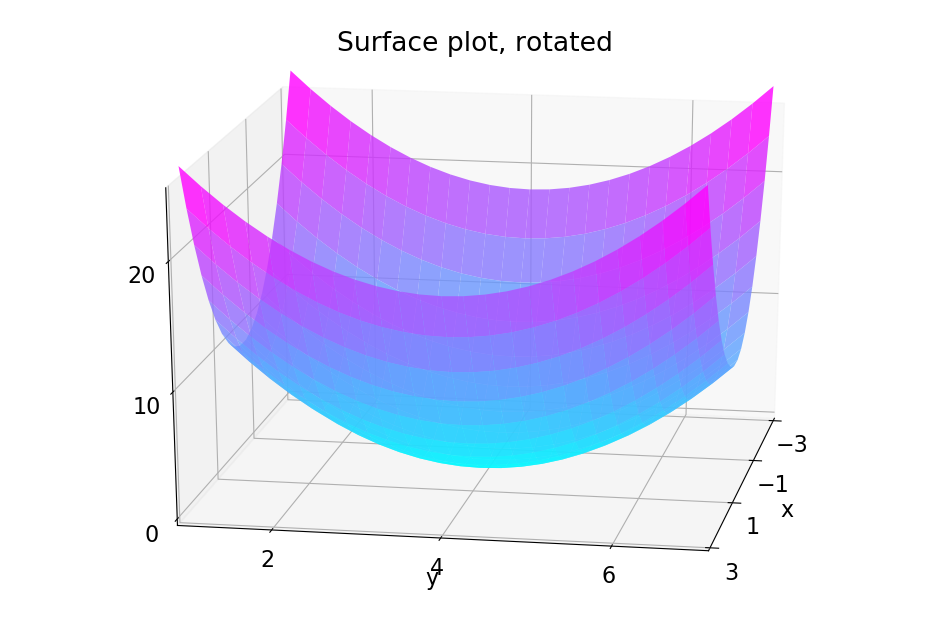

PyObject Text(0.5, 0.92, 'Surface plot, rotated')

In [10]:
PyPlot.matplotlib.rc("font",size=16)
figure(figsize=(12,8))
ax = gca(projection="3d")                          #notice
  surf(x,y,z',rstride=1,cstride=1,cmap=ColorMap("cool"),alpha=0.8)    
  xlim(-3,3)              #change rstride and cstride to improve the look            
  ylim(1,7)
  zlim(0,30)
  ax.view_init(elev=20.0,azim=10)               #notice: elevation and azimuth 
  plt.xticks(-3:2:3)
  plt.yticks(2:2:6)
  ax.set_zlim([0,25])
  ax.set_zticks([0;10;20])
  xlabel("x")
  ylabel("y")
  title("Surface plot, rotated")

# Contour Plot

As an alternative to a surface plot, consider a contour plot. The syntax is `contour(x,y,z',...)`, which is similar to the surface plot.

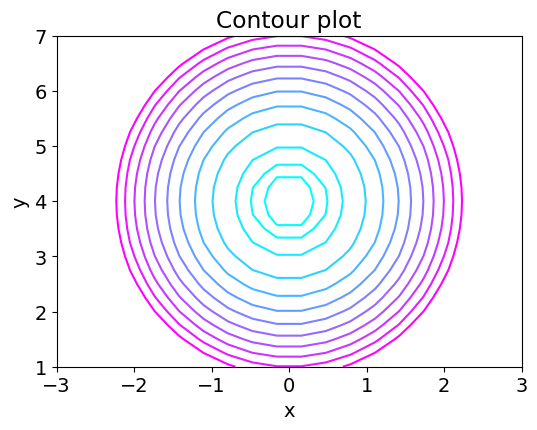

PyObject Text(0.5, 1, 'Contour plot')

In [11]:
PyPlot.matplotlib.rc("font",size=14)
fig1 = figure(figsize=(6,4.3))
ax = gca()
  lev = [0.25;0.5;1:1:10]
  contour(x,y,z',lev,cmap=ColorMap("cool"))
  xlim(-3,3)                         
  ylim(1,7)
  xlabel("x")
  ylabel("y")
  title("Contour plot")

# Scatter and Histogram


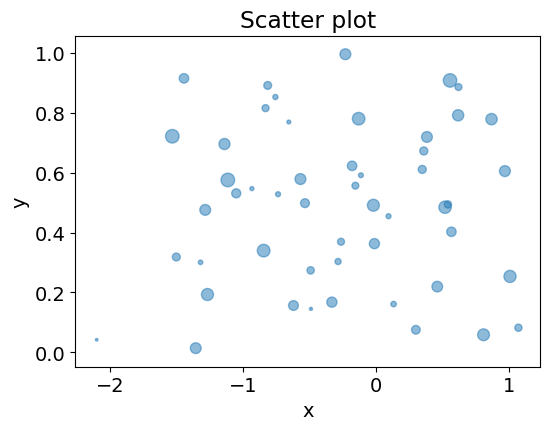

PyObject Text(29.0, 0.5, 'y')

In [12]:
N = 51
x = randn(N)                         #SCATTER, HISTOGRAM
y = rand(N)
areas = rand(51)*100                   #size of the scatter points, could be a scalar

figure(figsize=(6,4.3))
  scatter(x,y,s=areas,alpha=0.5)       #s is the size of the circles
  title("Scatter plot")
  xlabel("x")
  ylabel("y")

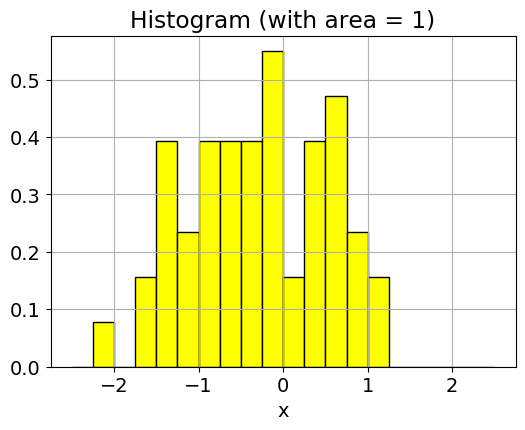

PyObject Text(0.5, 29.0, 'x')

In [13]:
figure(figsize=(6,4.3))                  
  Bins = -2.5:0.25:2.5
  hist(x,bins=Bins,density=true,color="yellow",edgecolor="k")        
  grid(true)
  title("Histogram (with area = 1)")
  xlabel("x")

# Time Series Plots

The (time) tick marks in time series plots often need tweaking. The cell below does that by first creating a vector of dates (`xTicks`) where I want the time marks, and then calls on `xticks(xTicks)`.

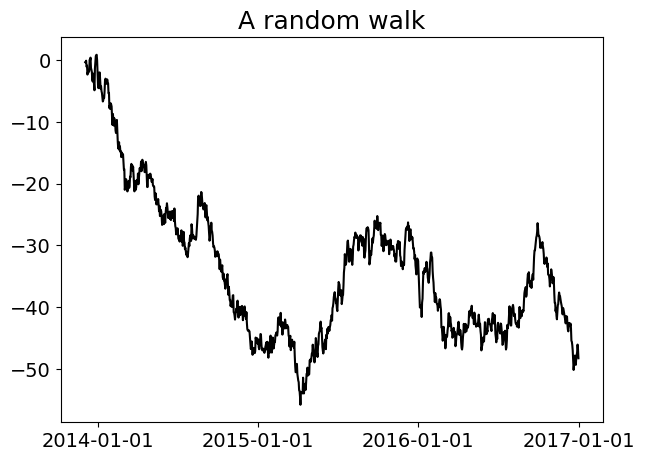

PyObject Text(0.5, 1, 'A random walk')

In [14]:
dN = Date(2013,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
dN = collect(dN)                                     #to a vector
y  = randn(length(dN))                               #some random numbers to plot 

xTicks = Date(2014,1,1):Dates.Year(1):Date(2017,1,1) #tick marks on x axis

figure(figsize=(7,7/1.4))          #basic time series plot
  plot_date(dN,cumsum(y),"k-")
  xticks(xTicks)
  title("A random walk",fontsize=18)